In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display
from skimpy import skim
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA, KernelPCA
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [389]:
df = pd.read_csv('data_simulation.csv')

In [390]:
df_init = pd.read_csv('data_init.csv')

In [391]:
df_init

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_estim_lat,seller_estim_lng,customer_estim_lat,customer_estim_lng,product_category_name
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,64.0,31.0,8577,itaquaquecetuba,SP,-23.486138,-46.367107,-20.499273,-47.396658,office_furniture
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,15.0,40.0,88303,itajai,SC,-26.912506,-48.674090,-23.728396,-46.542250,housewares
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,52.0,17.0,8577,itaquaquecetuba,SP,-23.486138,-46.367107,-23.531309,-46.656690,office_furniture
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,51.0,28.0,8577,itaquaquecetuba,SP,-23.486138,-46.367107,-23.500670,-46.186348,office_furniture
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,15.0,35.0,14940,ibitinga,SP,-21.757225,-48.829541,-22.975708,-47.143140,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112648,115717,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,...,22.0,23.0,17400,garca,SP,-22.211504,-49.658895,-23.586179,-46.499652,books_general_interest
112649,115718,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,...,24.0,22.0,14802,araraquara,SP,-21.772215,-48.180724,-23.616789,-46.767716,sports_leisure
112650,115719,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,...,20.0,18.0,3304,sao paulo,SP,-23.545570,-46.577968,-3.735628,-38.510775,health_beauty
112651,115720,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,...,13.0,14.0,14840,guariba,SP,-21.363473,-48.229588,-29.949964,-51.168380,watches_gifts


In [392]:
df_init['order_purchase_timestamp'] = pd.to_datetime(df_init['order_purchase_timestamp'])
df_init = df_init[['customer_unique_id','order_purchase_timestamp']].sort_values('order_purchase_timestamp').reset_index()
df_test = df_init[df_init['order_purchase_timestamp'] > '2017-09-01 00:00:00']
df_train = df_init[df_init['order_purchase_timestamp'] < '2017-09-01 00:00:00']

In [393]:
df_test_ari = pd.merge(df, df_test , on='customer_unique_id', how='inner')
df_test_ari.set_index('order_purchase_timestamp', inplace=True)

In [394]:
df_test_ari

,customer_unique_id,total_dep_by_customer,nb_products_buy,Volume_product_cm3,fav_categ_encoded,eval_mean_per_customer,nb_of_comment,fav_payment_type_encoded,distance_customer_seller,Cluster,index
order_purchase_timestamp,,,,,,,,,,,
2018-05-10 10:56:27,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1.0,7616.0,92.644959,5.0,1.0,1.0,110.528468,1,72554
2018-05-07 11:11:27,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1.0,5148.0,130.087835,4.0,0.0,1.0,22.233428,2,27815
2017-10-12 20:29:41,0000f6ccb0745a6a4b88665a16c9f078,43.62,1.0,1045.0,70.286568,4.0,1.0,1.0,2481.241232,3,64651
2017-11-14 19:45:42,0004aac84e0df4da2b147fca70cf8255,196.89,1.0,528.0,70.286568,5.0,0.0,1.0,154.518198,2,92052
2018-04-05 19:33:16,0004bd2a26a76fe21f786e4fbd80607f,166.98,1.0,8241.0,109.864643,4.0,0.0,1.0,27.261853,2,12585
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-15 10:26:57,fff96bc586f78b1f070da28c4977e810,63.42,1.0,2415.0,90.332958,4.0,0.0,1.0,311.573538,2,4298
2017-10-30 20:39:50,fffa431dd3fcdefea4b1777d114144f2,81.20,1.0,28600.0,161.784906,5.0,0.0,0.0,447.113026,0,27995
2017-12-17 19:14:35,fffb09418989a0dbff854a28163e47c6,73.16,1.0,1638.0,199.951299,5.0,0.0,0.0,364.212074,0,9785


## Test du ARI sur le df principal (Validation)

In [395]:
# Standarisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_test_ari.drop(columns=['customer_unique_id','Cluster','index']))

kmeans = KMeans(n_clusters=8, init='k-means++', n_init=1, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_init=1, random_state=42)

In [396]:
df_test_ari['Cluster'] = kmeans.labels_

In [397]:
# Obtenir les étiquettes de cluster attribuées par le k-means
cluster_labels = kmeans.labels_

# Supposons que vous ayez également un dataframe final avec les étiquettes de cluster réelles
# qui représentent la vérité terrain (ground truth) des clusters
# Vous pouvez le charger dans un dataframe 'ground_truth'

# Calculer l'indice de Rand ajusté entre les clusters prédits et les clusters réels (ground truth)
ari = adjusted_rand_score(df_test_ari['Cluster'], cluster_labels)

# Afficher l'indice de Rand ajusté
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 1.0


## Création des échantillons

In [398]:
df_train['order_purchase_timestamp'] = pd.to_datetime(df_train['order_purchase_timestamp'])
df_train.set_index('order_purchase_timestamp', inplace=True)


# Définir la fréquence de découpage par six mois
freq = '1Y'

# Découper le dataframe en différents échantillons temporels tous les six mois
annual_samples = [group for _, group in df_train.groupby(pd.Grouper(freq=freq))]
annual_samples = annual_samples[::-1]


# Définir la fréquence de découpage par six mois
freq = '6M'

# Découper le dataframe en différents échantillons temporels tous les six mois
semi_annual_samples = [group for _, group in df_train.groupby(pd.Grouper(freq=freq))]
semi_annual_samples = semi_annual_samples[::-1]

# Définir la fréquence de découpage par trois mois
freq = '3M' 

# Découper le dataframe en différents échantillons temporels tous les trois mois
quarterly_samples = [group for _, group in df_train.groupby(pd.Grouper(freq=freq))]
quarterly_samples = quarterly_samples[::-1]

# Définir la fréquence de découpage par mois
freq = 'M' 

monthly_samples = [group for _, group in df_train.groupby(pd.Grouper(freq=freq))]
monthly_samples = monthly_samples[::-1]
# Définir la fréquence de découpage par semaine
freq = 'W'

# Découper le dataframe en différents échantillons temporels par semaine
weekly_samples = [group for _, group in df_train.groupby(pd.Grouper(freq=freq))]
weekly_samples = weekly_samples[::-1]

/tmp/ipykernel_7425/3961610117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['order_purchase_timestamp'] = pd.to_datetime(df_train['order_purchase_timestamp'])


In [399]:
# Standarisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_test_ari.drop(columns=['customer_unique_id','Cluster','index']))

### Weekly

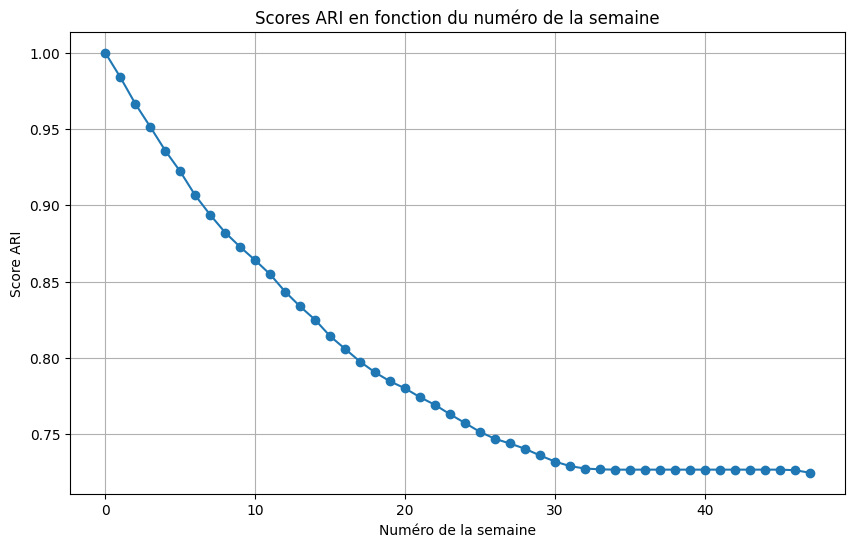

In [400]:
# Créer un DataFrame pour stocker les scores ARI
ari_df = pd.DataFrame(columns=['Week', 'ARI'])

# Initialiser un DataFrame cumulatif pour les données
cumulative_df = None

# Pour chaque échantillon temporel, effectuer le clustering et calculer l'ARI
for i in range(len(weekly_samples)):
    kmeans = KMeans(n_clusters=8, init='k-means++', n_init=1, random_state=42)
    kmeans.fit(df_scaled)
    df_i = pd.merge(df, weekly_samples[i], on='customer_unique_id', how='inner')
    
    if cumulative_df is None:
        cumulative_df = df_test_ari.copy()
    else:
        cumulative_df = cumulative_df.append(df_i, ignore_index=True)
    
    df_i_scaled = scaler.fit_transform(cumulative_df.drop(columns=['customer_unique_id','Cluster','index']))
    
    cluster_labels = kmeans.predict(df_i_scaled)
    ari = adjusted_rand_score(cumulative_df['Cluster'], cluster_labels)
    # Ajouter l'ARI au DataFrame
    ari_df = ari_df.append({'Week': i, 'ARI': ari}, ignore_index=True)
# Tracer les scores ARI en fonction du numéro de la semaine

plt.figure(figsize=(10, 6))
plt.plot(ari_df['Week'], ari_df['ARI'], marker='o', linestyle='-')
plt.title('Scores ARI en fonction du numéro de la semaine')
plt.xlabel('Numéro de la semaine')
plt.ylabel('Score ARI')
plt.grid(True)
plt.show()

### Monthly

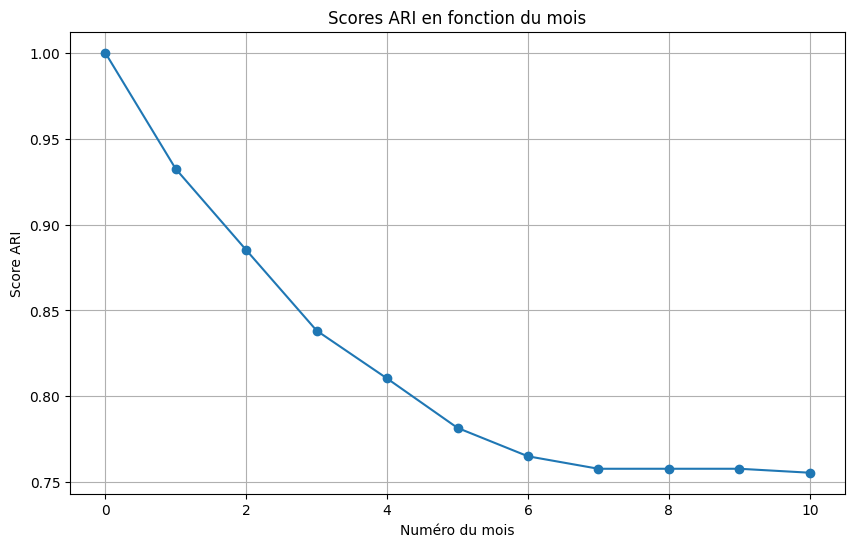

In [401]:
# Créer un DataFrame pour stocker les scores ARI
ari_df = pd.DataFrame(columns=['Week', 'ARI'])

# Initialiser un DataFrame cumulatif pour les données
cumulative_df = None

# Pour chaque échantillon temporel, effectuer le clustering et calculer l'ARI
for i in range(len(monthly_samples)):
    kmeans = KMeans(n_clusters=8, init='k-means++', n_init=1, random_state=42)
    kmeans.fit(df_scaled)
    df_i = pd.merge(df, monthly_samples[i], on='customer_unique_id', how='inner')
    
    if cumulative_df is None:
        cumulative_df = df_test_ari.copy()
    else:
        cumulative_df = cumulative_df.append(df_i, ignore_index=True)
    
    df_i_scaled = scaler.fit_transform(cumulative_df.drop(columns=['customer_unique_id','Cluster','index']))
    
    cluster_labels = kmeans.predict(df_i_scaled)
    ari = adjusted_rand_score(cumulative_df['Cluster'], cluster_labels)
    # Ajouter l'ARI au DataFrame
    ari_df = ari_df.append({'Week': i, 'ARI': ari}, ignore_index=True)

plt.figure(figsize=(10, 6))
plt.plot(ari_df['Week'], ari_df['ARI'], marker='o', linestyle='-')
plt.title('Scores ARI en fonction du mois')
plt.xlabel('Numéro du mois')
plt.ylabel('Score ARI')
plt.grid(True)
plt.show()

### Trimestre

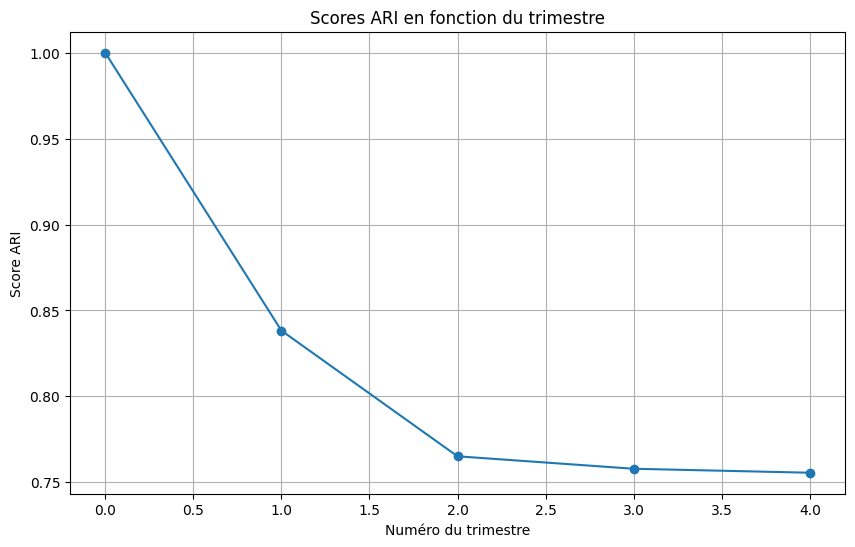

In [402]:
# Créer un DataFrame pour stocker les scores ARI
ari_df = pd.DataFrame(columns=['Week', 'ARI'])

# Initialiser un DataFrame cumulatif pour les données
cumulative_df = None

# Pour chaque échantillon temporel, effectuer le clustering et calculer l'ARI
for i in range(len(quarterly_samples)):
    kmeans = KMeans(n_clusters=8, init='k-means++', n_init=1, random_state=42)
    kmeans.fit(df_scaled)
    df_i = pd.merge(df, quarterly_samples[i], on='customer_unique_id', how='inner')
    
    if cumulative_df is None:
        cumulative_df = df_test_ari.copy()
    else:
        cumulative_df = cumulative_df.append(df_i, ignore_index=True)
    
    df_i_scaled = scaler.fit_transform(cumulative_df.drop(columns=['customer_unique_id','Cluster','index']))
    
    cluster_labels = kmeans.predict(df_i_scaled)
    ari = adjusted_rand_score(cumulative_df['Cluster'], cluster_labels)
    # Ajouter l'ARI au DataFrame
    ari_df = ari_df.append({'Week': i, 'ARI': ari}, ignore_index=True)


plt.figure(figsize=(10, 6))
plt.plot(ari_df['Week'], ari_df['ARI'], marker='o', linestyle='-')
plt.title('Scores ARI en fonction du trimestre')
plt.xlabel('Numéro du trimestre')
plt.ylabel('Score ARI')
plt.grid(True)
plt.show()

### Semestre

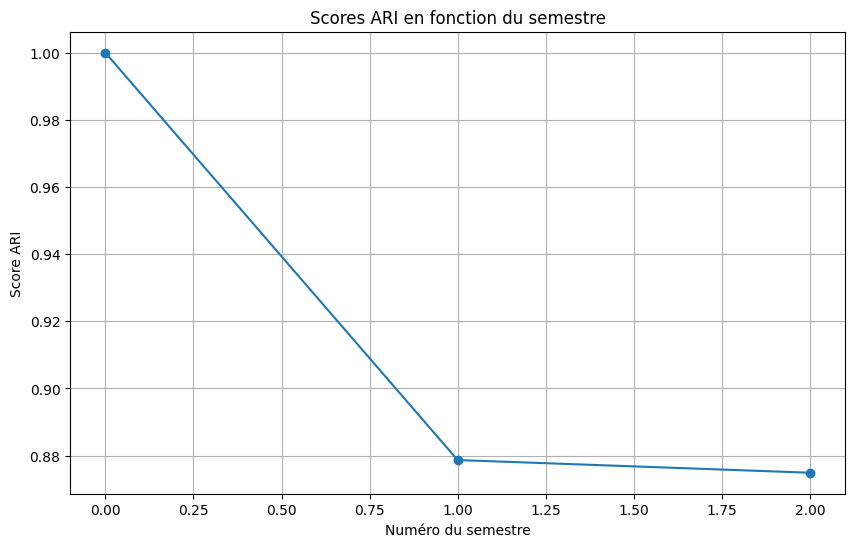

In [403]:
# Créer un DataFrame pour stocker les scores ARI
ari_df = pd.DataFrame(columns=['Week', 'ARI'])

# Initialiser un DataFrame cumulatif pour les données
cumulative_df = None

# Pour chaque échantillon temporel, effectuer le clustering et calculer l'ARI
for i in range(len(semi_annual_samples)):
    kmeans = KMeans(n_clusters=8, init='k-means++', n_init=1, random_state=42)
    kmeans.fit(df_scaled)
    df_i = pd.merge(df, semi_annual_samples[i], on='customer_unique_id', how='inner')
    
    if cumulative_df is None:
        cumulative_df = df_test_ari.copy()
    else:
        cumulative_df = cumulative_df.append(df_i, ignore_index=True)
    
    df_i_scaled = scaler.fit_transform(cumulative_df.drop(columns=['customer_unique_id','Cluster','index']))
    
    cluster_labels = kmeans.predict(df_i_scaled)
    ari = adjusted_rand_score(cumulative_df['Cluster'], cluster_labels)
    # Ajouter l'ARI au DataFrame
    ari_df = ari_df.append({'Week': i, 'ARI': ari}, ignore_index=True)

plt.figure(figsize=(10, 6))
plt.plot(ari_df['Week'], ari_df['ARI'], marker='o', linestyle='-')
plt.title('Scores ARI en fonction du semestre')
plt.xlabel('Numéro du semestre')
plt.ylabel('Score ARI')
plt.grid(True)
plt.show()

### Conclusion : 
##### Selon le seuil de performance que l'on choisi nous :
##### - score > 0.95 => MAJ Mensuel 
##### - score > 0.80 => ~17 semaines donc MAJ tout les trimestre conseillé. 